In [20]:
import os
import torch
import numpy as np
from torchvision.transforms import Compose, ToTensor, Resize
from matplotlib import pyplot as plt
from PIL import Image
from tqdm.notebook import tqdm

In [17]:
root_dir = os.path.join(os.curdir, "..")
data_dir = os.path.join(root_dir, "data", "processed", "train", "images")

In [18]:
num_samples = len(os.listdir(data_dir))

In [21]:
transformations = Compose([
    Resize((512, 512)),
    ToTensor()
])

In [22]:
def load_image(path:str)->np.ndarray:
    return transformations(Image.open(fp=path))

In [26]:
images = torch.empty(num_samples, 1, 512, 512)
for index, image_name in enumerate(tqdm(os.listdir(data_dir))):
    image_path = os.path.join(data_dir, image_name)
    image = load_image(path=image_path)
    images[index] = image


In [29]:
images.mean(), images.std()

(tensor(0.4828), tensor(0.2488))

In [11]:
means = np.array(means)
stds = np.array(stds)

In [13]:
global_mean, global_std = means.mean(), stds.mean()

In [14]:
global_mean, global_std

(0.4822932930815681, 0.2306876574269001)

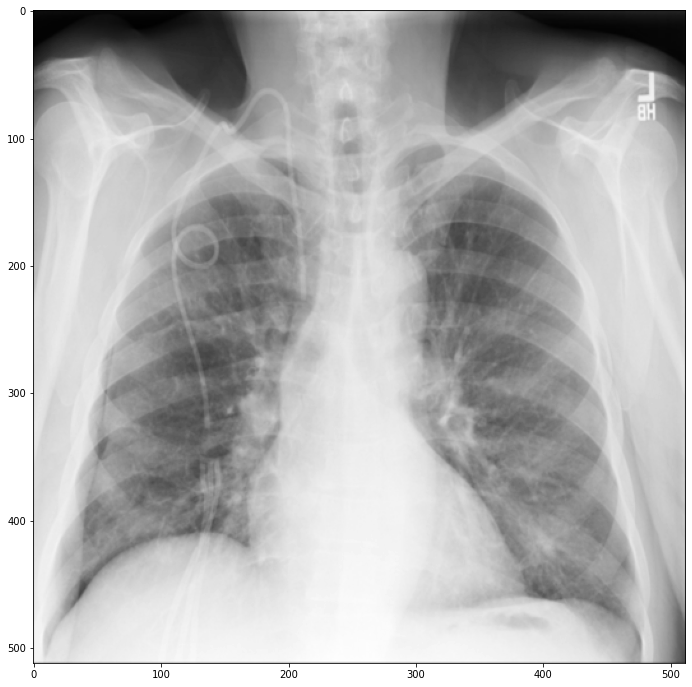

In [55]:
fig, ax  = plt.subplots(figsize=(15, 12))
ax.imshow(images[7000].squeeze(0), cmap="gray")

fig.show()